## Построение гистограмм

## Загрузка пакетов

In [1]:
import fmna.dataloader as dataloader
import matplotlib.pyplot as plt
import os

## Настройка

In [2]:
settings = {
    "path": '../stress_preprocessed',
    "save_path": '../histograms',
    'plot': True
}

## Загрузка данных

<b>Необходим предварительный запуск препроцессора</b>

In [36]:
data = dataloader.loadData(settings['path'])

## Построение гистограмм

In [25]:
def plot_histogram(data, title, path):
    fig, axs = plt.subplots()
    axs.hist(data, bins=20)
    fig.suptitle(title)
    plt.savefig(path + os.sep + title + '.png')
    plt.close()

if not os.path.exists(settings['save_path']):
    os.mkdir(settings['save_path'])
for s in data:
    sum = s[1].sum()
    sum.to_csv(settings['save_path'] + os.sep + s[0]['file'], sep=';')
    if settings['plot']:
        plot_histogram(sum, s[0]['file'], settings['save_path'])

    

## Другой способ построить гистограммы

P.S. Пока не красиво

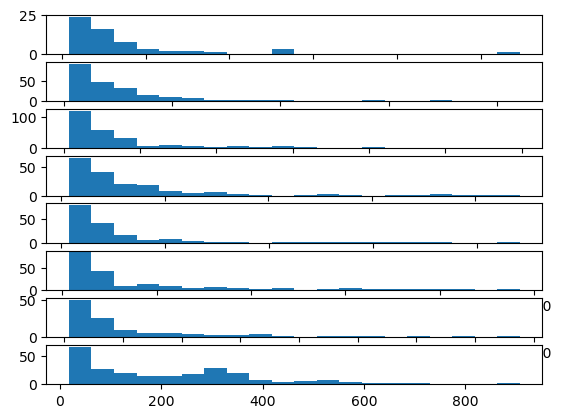

In [44]:
animal = [x[0]['animal'] for x in data]
animal = list(set(animal))

subdata = [x for x in data if x[0]['animal'] == animal[0]]

fig, axs = plt.subplots(len(subdata))

for i, session in enumerate(subdata):
    sum = session[1].sum()
    axs[i].hist(sum, bins=20)
